In [ ]:
pip install pycaret

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/time_series_we.csv')
from pycaret.time_series import *

# **Setup**

In [14]:
Experiment = TSForecastingExperiment()

In [15]:
fh = 30
fold = 3
fig_kwargs = {
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [18]:
Experiment = setup(data = df['Main_Series'] , fh=fh, fold = fold, numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill", fig_kwargs=fig_kwargs)
Experiment.setup(data = df['Main_Series'], fh=fh, fold = fold, numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill", fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,2179
1,Target,Main_Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(520, 1)"
5,Transformed data shape,"(520, 1)"
6,Transformed train set shape,"(490, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Description,Value
0,session_id,1801
1,Target,Main_Series
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(520, 1)"
5,Transformed data shape,"(520, 1)"
6,Transformed train set shape,"(490, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


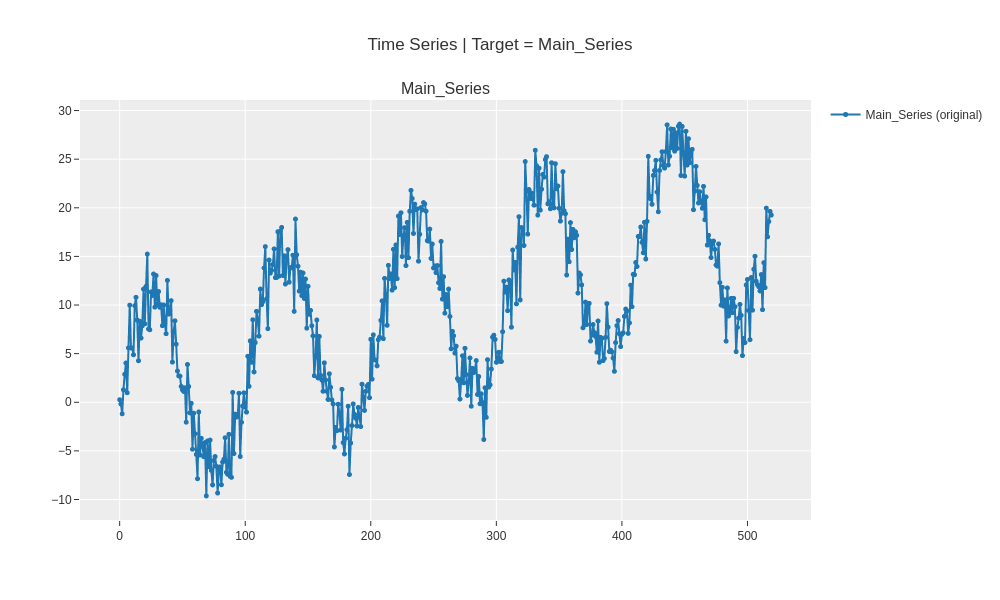

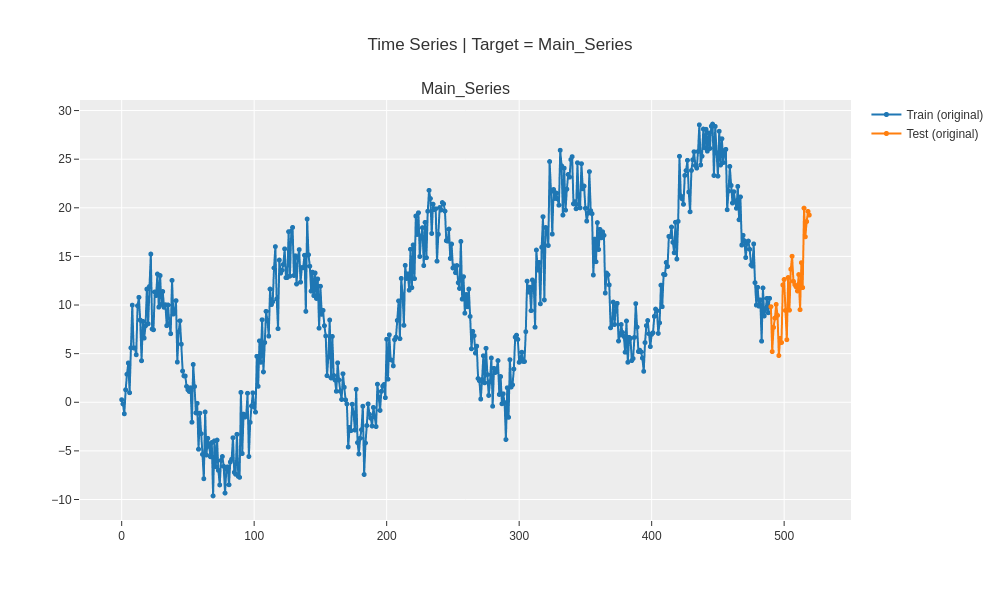

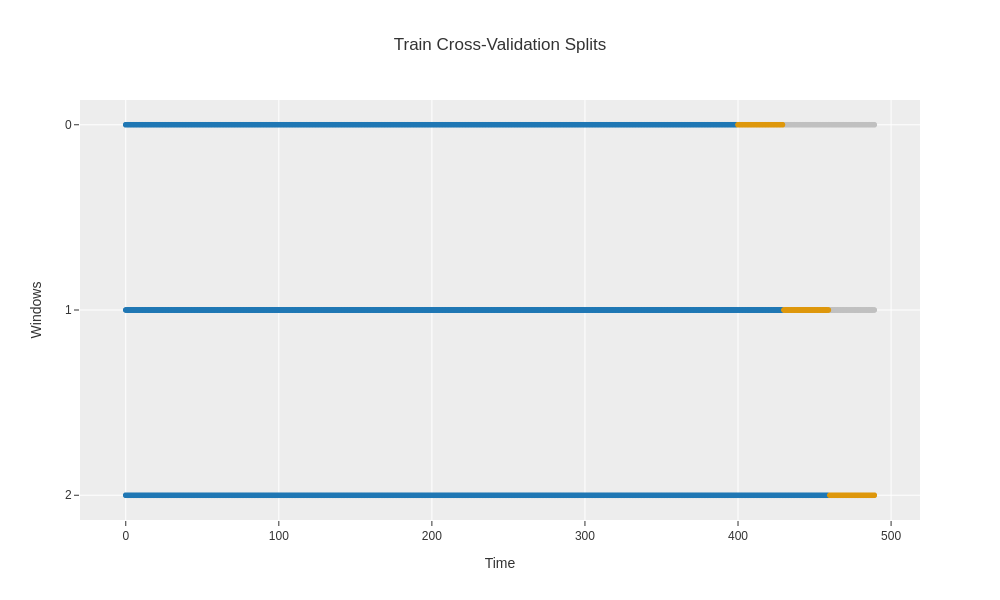

In [21]:
Experiment.plot_model()
Experiment.plot_model(plot="train_test_split")
Experiment.plot_model(plot="cv")

# **Modeling**

In [62]:
forecaster = Experiment.create_model("lr_cds_dt")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,399.0000,1.8206,1.8138,4.4939,5.6130,0.2478,0.2899,-0.0192
1,429.0000,3.5048,2.8849,8.5162,8.8152,0.3279,0.3959,-16.8349
2,459.0000,2.5582,2.3658,6.2161,7.1993,0.5548,0.3844,-1.5208
Mean,nan,2.6279,2.3549,6.4087,7.2092,0.3768,0.3567,-6.1250
SD,nan,0.6893,0.4374,1.6477,1.3073,0.1301,0.0475,7.5978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
forecasts = Experiment.predict_model(forecaster)
forecasts

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LinearRegression,2.0263,1.8578,4.8599,5.5810,0.5641,0.3899,-0.7987


,y_pred
490,11.3728
491,12.0048
492,12.5869
493,13.1233
494,13.6179
495,14.0741
496,14.4951
497,14.8839
498,15.2432
499,15.5754


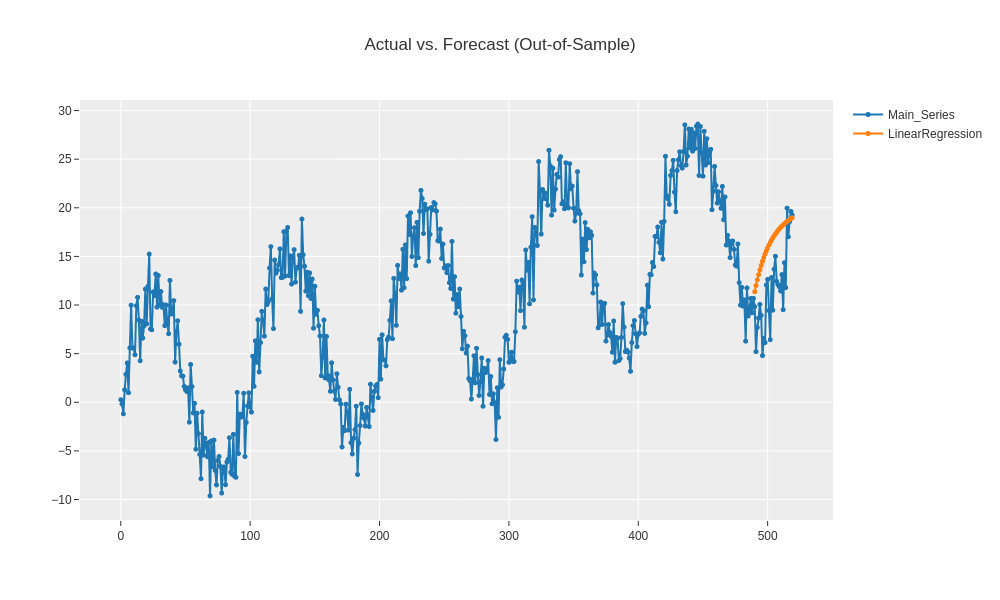

In [64]:
Experiment.plot_model(estimator=forecaster)

# **Tuning Model**

In [70]:
tuned_Forcaster = Experiment.tune_model(forecaster)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,399.0000,1.7835,1.7815,4.4023,5.5131,0.2428,0.2828,0.0167
1,429.0000,3.5466,2.9181,8.6178,8.9167,0.3319,0.4017,-17.2480
2,459.0000,2.5198,2.3333,6.1228,7.1002,0.5470,0.3802,-1.4519
Mean,nan,2.6167,2.3443,6.3810,7.1767,0.3739,0.3549,-6.2277
SD,nan,0.7230,0.4641,1.7306,1.3906,0.1277,0.0517,7.8155


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.5s finished


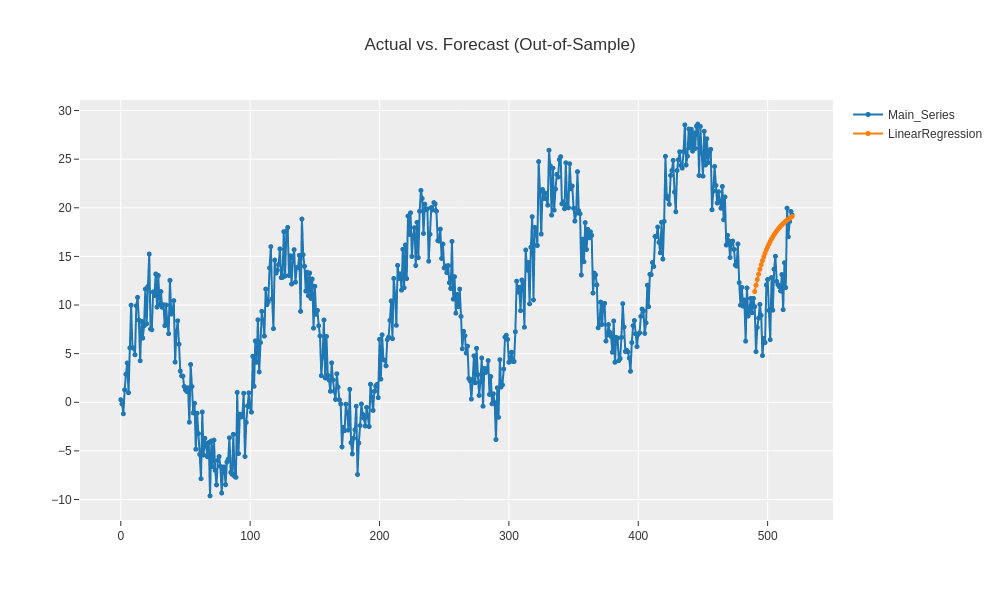

In [71]:
Experiment.plot_model(tuned_Forcaster)

# **Saving Model**

In [68]:
save_model(tuned_Forcaster, 'Time_Series_we')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(method='ffill',
                                                                                                     random_state=1801))])),
                                                                ('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                                                                                    n_jobs=1)],
                                                                                     regressor=LinearRegression(fit_intercept=False, n_jobs=-1),
                         

# **Loading Model**

In [69]:
load = load_model('Time_Series_we')
load

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(method='ffill',
                                                                                                    random_state=1801))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=LinearRegression(fit_intercept=False, n_jobs=-1),
                                                                                    window_length=1))]))])